## data: http://ufldl.stanford.edu/housenumbers/

In [55]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

In [27]:
from scipy.io import loadmat
from sklearn.utils import shuffle

In [28]:
def y2indicator(y):
    N = len(y)
    ind = np.zeros((N,10))
    for i in range(N):
        ind[i,y[i]]=1
    return ind

# one-hot coding

In [29]:
def error_rate(p,t):
    return np.mean(p != t)
# p -- predict
# t -- target

In [30]:
def flatten(X):
    N = X.shape[-1]
    flat = np.zeros((N,3072))
    for i in range(N):
        flat[i]=X[:,:,:,i].reshape(3072)
    return flat

In [31]:
train_data = loadmat('../dataset/train_32x32.mat')
test_data = loadmat('../dataset/test_32x32.mat')

# train_data

{'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
         
          [ 79,  80, 231, ..., 218, 209, 171]]]], dtype=uint8),
          
        'y': array([[1],
        [9],
        [2],
        ..., 
        [1],
        [6],
        [9]], dtype=uint8)}

In [32]:
X_train = flatten(train_data['X'].astype(np.float32)/255)

In [33]:
X_train

array([[ 0.12941177,  0.11764706,  0.14901961, ...,  0.40392157,
         0.41568628,  0.30980393],
       [ 0.32941177,  0.29803923,  0.23137255, ...,  0.40392157,
         0.38431373,  0.3137255 ],
       [ 0.07450981,  0.21176471,  0.43137255, ...,  0.24705882,
         0.56862748,  0.90588236],
       ..., 
       [ 0.36078432,  0.30588236,  0.39607844, ...,  0.85490197,
         0.8509804 ,  0.85490197],
       [ 0.74509805,  0.73725492,  0.74901962, ...,  0.85490197,
         0.83529413,  0.81960785],
       [ 0.84705883,  0.8509804 ,  0.83137256, ...,  0.70980394,
         0.69803923,  0.67058825]])

In [34]:
Y_train = train_data['y'].flatten()-1

In [35]:
len(Y_train)

73257

In [36]:
Y_train

array([0, 8, 1, ..., 0, 5, 8], dtype=uint8)

In [37]:
X_test = flatten(test_data['X'].astype(np.float32)/255)
Y_test = test_data['y'].flatten()-1

In [38]:
X_train, Y_train = shuffle(X_train, Y_train)
Y_train_ind = y2indicator(Y_train)

In [39]:
Y_train_ind

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [40]:
X_train

array([[ 0.31764707,  0.28235295,  0.29411766, ...,  0.30588236,
         0.33725491,  0.42745098],
       [ 0.18039216,  0.20392157,  0.25098041, ...,  0.25098041,
         0.29019609,  0.29411766],
       [ 0.56078434,  0.56470591,  0.50980395, ...,  0.14901961,
         0.13725491,  0.10980392],
       ..., 
       [ 0.41568628,  0.41960785,  0.35686275, ...,  0.49411765,
         0.50980395,  0.44313726],
       [ 0.38431373,  0.36078432,  0.30588236, ...,  0.59215689,
         0.6156863 ,  0.60784316],
       [ 0.29019609,  0.3019608 ,  0.36078432, ...,  0.37254903,
         0.39215687,  0.40392157]])

In [41]:
Y_test_ind = y2indicator(Y_test)

In [42]:
Y_test_ind

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [62]:
max_iter = 20
print_period = 10
N,D = X_train.shape
batch_size = 500
n_batches = int(N/batch_size)

In [59]:
N

73257

In [61]:
int(n_batches)

146

In [44]:
M1 = 1000 
M2 = 500
K = 10

In [45]:
W1_init = np.random.randn(D, M1) / np.sqrt(D + M1)
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1 + M2)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2 + K)
b3_init = np.zeros(K)

In [46]:
W1_init

array([[  7.52997719e-03,   3.57068013e-03,   4.59663433e-03, ...,
         -1.06265146e-02,  -1.16040464e-03,   2.61525810e-02],
       [  1.83406467e-03,   5.35732332e-04,  -1.89234816e-02, ...,
          1.69892084e-02,   2.19376149e-02,  -1.42260708e-02],
       [ -1.48455754e-02,   6.33612383e-03,   2.46316966e-02, ...,
         -1.52599669e-02,   8.52083497e-03,   2.92734174e-03],
       ..., 
       [ -2.62663230e-02,  -1.24775702e-02,  -2.48838564e-03, ...,
          1.87001390e-03,   1.35071625e-02,   2.29983863e-02],
       [  1.89832313e-02,   1.70721388e-03,   3.42410364e-04, ...,
         -3.52593132e-03,  -1.86480345e-02,  -2.75082142e-05],
       [ -1.89541784e-02,   1.87552000e-02,  -7.44365196e-03, ...,
          2.93213225e-02,  -5.33619802e-03,  -3.51140266e-03]])

In [47]:
X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T')
W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

In [48]:
Z1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )
Yish = tf.matmul(Z2, W3) + b3

In [49]:
cost = tf.reduce_sum(
    tf.nn.softmax_cross_entropy_with_logits(logits=Yish, labels=T))

In [50]:
cost

<tf.Tensor 'Sum:0' shape=() dtype=float32>

In [56]:
train_op = tf.train.RMSPropOptimizer(0.0001, decay=0.99, momentum=0.9).minimize(cost)

    # we'll use this to calculate the error rate
predict_op = tf.argmax(Yish, 1)

t0 = datetime.now()
LL = []
init = tf.global_variables_initializer()

In [63]:
with tf.Session() as session:
    session.run(init)
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = X_train[j*batch_size:(j*batch_size + batch_size),]
            Ybatch = Y_train_ind[j*batch_size:(j*batch_size + batch_size),]

            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if j % print_period == 0:
                test_cost = session.run(cost, feed_dict={X: X_test, T: Y_test_ind})
                prediction = session.run(predict_op, feed_dict={X: X_test})
                err = error_rate(prediction, Y_test)
                print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                LL.append(test_cost)
print("Elapsed time:", (datetime.now() - t0))

Cost / err at iteration i=0, j=0: 58378.363 / 0.811
Cost / err at iteration i=0, j=10: 58624.352 / 0.804
Cost / err at iteration i=0, j=20: 58364.852 / 0.804
Cost / err at iteration i=0, j=30: 58145.414 / 0.804
Cost / err at iteration i=0, j=40: 58036.273 / 0.804
Cost / err at iteration i=0, j=50: 57813.273 / 0.791
Cost / err at iteration i=0, j=60: 57387.984 / 0.795
Cost / err at iteration i=0, j=70: 56602.309 / 0.781
Cost / err at iteration i=0, j=80: 55882.828 / 0.766
Cost / err at iteration i=0, j=90: 53807.625 / 0.750
Cost / err at iteration i=0, j=100: 51342.527 / 0.680
Cost / err at iteration i=0, j=110: 50593.414 / 0.679
Cost / err at iteration i=0, j=120: 47568.020 / 0.635
Cost / err at iteration i=0, j=130: 46476.445 / 0.617
Cost / err at iteration i=0, j=140: 45166.305 / 0.612
Cost / err at iteration i=1, j=0: 43092.785 / 0.571
Cost / err at iteration i=1, j=10: 42451.270 / 0.537
Cost / err at iteration i=1, j=20: 41225.117 / 0.516
Cost / err at iteration i=1, j=30: 40406.87

Cost / err at iteration i=10, j=40: 22125.123 / 0.243
Cost / err at iteration i=10, j=50: 21119.463 / 0.235
Cost / err at iteration i=10, j=60: 21494.943 / 0.236
Cost / err at iteration i=10, j=70: 21250.025 / 0.234
Cost / err at iteration i=10, j=80: 20949.617 / 0.232
Cost / err at iteration i=10, j=90: 21577.875 / 0.243
Cost / err at iteration i=10, j=100: 21779.016 / 0.243
Cost / err at iteration i=10, j=110: 22565.945 / 0.256
Cost / err at iteration i=10, j=120: 21733.512 / 0.236
Cost / err at iteration i=10, j=130: 22468.236 / 0.250
Cost / err at iteration i=10, j=140: 22944.014 / 0.258
Cost / err at iteration i=11, j=0: 21556.100 / 0.241
Cost / err at iteration i=11, j=10: 23115.857 / 0.259
Cost / err at iteration i=11, j=20: 22089.836 / 0.243
Cost / err at iteration i=11, j=30: 21472.662 / 0.236
Cost / err at iteration i=11, j=40: 22052.043 / 0.242
Cost / err at iteration i=11, j=50: 21295.004 / 0.236
Cost / err at iteration i=11, j=60: 21697.582 / 0.239
Cost / err at iteration 

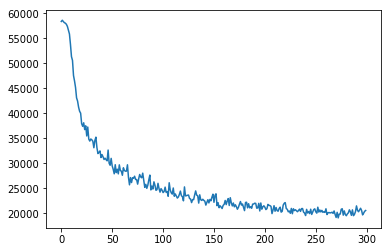

In [64]:
plt.plot(LL)
plt.show()